In [1043]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt

# Implementações
Etapa do código que implementa todos os métodos pedidos

(Os detalhes e a lógica das implementações estão no relatório)

### Método da Bissecção

In [1044]:
#f: Função estudada
#a0: Valor à esquerda na reta real inicial
#b0: Valor à direita na reta real inicial
#n: Número de iterações máximo
#tol: Tolerância do erro

def bissec(f, a0, b0, n, tol):
    a = [a0]
    b = [b0]
    i = 0
    
    while((i < n) & (abs(a[i] - b[i]) / 2 >tol) & (f(a[i]) * f(b[i]) != 0 )):       
        
        if(f(a[i]) * f((a[i] + b[i]) / 2) < 0):
            a.append(a[i])
            b.append((a[i] + b[i]) / 2)
            
        else:
            a.append((a[i] + b[i]) / 2)
            b.append(b[i])
        
        i += 1
        
    if(i == n):
        print('O cálculo falhou(Bissecção)')
        
    return(a, b)

def teste(x):
    y = x**2 - 1
    return y
bissec(teste, 0, 2, 50, 100)

([0], [2])

### Método da Secante

In [1045]:
#f: Função estudada
#x0: Primeiro ponto da reta secante inicial
#x1: Segundo ponto da reta secante inicial
#n: Número de iterações máximo
#tol: Tolerância do erro

def sec(f, x0, x1, n, tol):
    
    x = [x0, x1]
    i = 1
    
    while((i < n) & (abs(x[i] - x[i - 1])>tol) & (f(x[i - 1]) != 0) & (f(x[i]) != 0) & ((f(x[i]) - f(x[i - 1])) != 0)):
        
        x.append(x[i] - (f(x[i]) * (x[i] - x[i - 1]))/(f(x[i]) - f(x[i - 1])))
        
        i += 1
        
    if(i == n):
        print('O cálculo falhou(Secante)')
        
    return(x)

### Método de Newton

In [1046]:
#f: Função estudada
#df: Primeira derivada da função estudada
#x0: Primeiro ponto da iteração
#n: Número de iterações máximo
#tol: Tolerância do erro

def newton(f, df, x0, n, tol):
    
    x = [x0]
    i = 2
    
    if(df(x[0]) == 0):
        print('O cálculo falhou(Newton)')
        return(x)
    
    x.append(x[0] - f(x[0]) / df(x[0]))

    while((i < n) & (abs(x[i - 1] - x[i - 2]) > tol) & (f(x[i - 1]) != 0)):
        
        if(df(x[i - 1]) == 0):
            print('O cálculo falhou(Newton)')
            return(x)
        
        x.append(x[i - 1] - f(x[i - 1]) / df(x[i - 1]))
        
        i += 1
        
    if(i == n):
        print('O cálculo falhou(Newton)')
    return(x)



### Método de Halley

In [1047]:
#f: Função estudada
#df: Primeira derivada da função estudada
#d2f: Segunda derivada da função estudada
#x0: Primeiro ponto da iteração
#n: Número de iterações máximo
#tol: Tolerância do erro

def halley(f, df, d2f, x0, n, tol):
    
    x = [x0]
    i = 2
    
    if((df(x[0]) ** 2 - 1/2*(f(x[0]) * d2f(x[0])))== 0):
        print('O cálculo falhou(Halley)')
        return(x)
    
    x.append(x[0] - f(x[0]) / df(x[0]))

    while((i < n) & (abs(x[i - 1] - x[i - 2]) > tol) & (f(x[i - 1]) != 0)):
        
        if((df(x[i - 1]) ** 2 - 1/2*(f(x[i - 1]) * d2f(x[i - 1])))== 0):
            print('O cálculo falhou(Halley)')
            return(x)
        
        x.append(x[i - 1] - (f(x[i - 1]) * df(x[i - 1])) / ((df(x[i - 1])) ** 2 - 1/2*(f(x[i - 1]) * d2f(x[i - 1]))))
        i += 1
        
    if(i == n):
        print('O cálculo falhou(Halley)')
    return(x)

# Uso das implementações
Etapa do código que aplica a etapa anterior às equações pedidas

## 1ª Equação:
$x - \cos(x) = 0 $

In [1048]:
#Definindo a função e suas derivadas
def f(x):
    y = x - np.cos(x)
    return y

def df(x):
    y = np.sin(x) + 1
    return y

def d2f(x):
    y = np.cos(x)
    return y

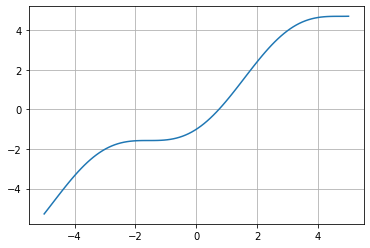

In [1049]:
#Plotando a função para auxiliar na escolha de pontos iniciais

x = np.linspace(-5, 5, 100)
plt.plot(x, f(x))
plt.grid()
plt.show()

In [1050]:
#Criação da tabela
bissec_aux = zip(bissec(f, 0, 2, 100, 1e-16)[0], bissec(f, 0, 2, 100, 1e-16)[1])
bissec_aux = (sum(i)/2 for i in bissec_aux)

metodo = [ bissec_aux, sec(f, 2, 4, 100, 1e-16), newton(f, df, 2, 100, 1e-16), halley(f, df, d2f, 2, 100, 1e-16)]

aux = 0
tabela_1 = pd.DataFrame({aux: ([i] for i in metodo[0])})
tabela_1[aux][0] = [bissec(f, -1, 2, 100, 1e-16)[0][0], bissec(f, -1, 2, 100, 1e-16)[1][0]]


for i in metodo[1:]:
    aux += 1
    tabela_1 = pd.concat([tabela_1, pd.DataFrame({aux: ([j] for j in i)})], axis = 1)
    
tabela_1.rename(columns = {0: 'Bissecção' , 1: 'Secante', 2: 'Newton', 3: 'Halley'}, inplace = True)

## 2ª Equação:
$x^3 - 9x^2 + 27x - 27 = 0 $

In [1051]:
#Definindo a função e suas derivadas
def g(x):
    y = x**3 - 9*x**2 + 27*x - 27
    return y

def dg(x):
    y = 3*x**2 - 18*x + 27
    return y

def d2g(x):
    y = 6*x - 18
    return y


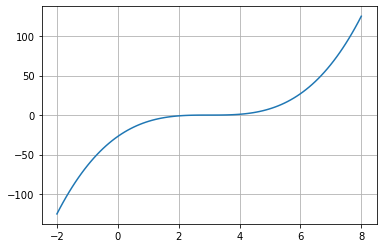

In [1052]:
#Plotando a função para auxiliar na escolha de pontos iniciais
x = np.linspace(-2, 8, 100)
plt.plot(x, g(x))
plt.grid()
plt.show()

In [1053]:
#Criação da tabela
bissec_aux = zip(bissec(g, -1, 6, 100, 1e-16)[0], bissec(g, -1, 6, 100, 1e-16)[1])
bissec_aux = (sum(i)/2 for i in bissec_aux)

metodo = [ bissec_aux, sec(g, -1, 6, 100, 1e-16), newton(g, dg, 2, 100, 1e-16), halley(g, dg, d2g, 0, 100, 1e-16)]

aux = 0
tabela_2 = pd.DataFrame({aux: ([i] for i in metodo[0])})
tabela_2[aux][0] = [bissec(g, -1, 6, 50, 1e-16)[0][0], bissec(g, -1, 6, 50, 1e-16)[1][0]]


for i in metodo[1:]:
    aux += 1
    tabela_2 = pd.concat([tabela_2, pd.DataFrame({aux: ([j] for j in i)})], axis = 1)
    
tabela_2.rename(columns = {0: 'Bissecção' , 1: 'Secante', 2: 'Newton', 3: 'Halley'}, inplace = True)

## 3ª Equação:
$e^x - \cos(x) = 0 $

In [1054]:
#Definindo a função e suas derivadas
def h(x):
    y = np.exp(x) - np.cos(x)
    return y

def dh(x):
    y = np.exp(x) + np.sin(x)
    return y

def d2h(x):
    y = np.exp(x) + np.cos(x)
    return y

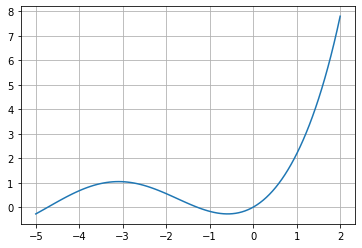

In [1055]:
#Plotando a função para auxiliar na escolha de pontos iniciais
def h_plot(x):
    y = np.exp(x) - np.cos(x)
    return y
x = np.linspace(-5, 2, 100)
plt.plot(x, h_plot(x))
plt.grid()
plt.show()

In [1056]:
#Criação da tabela
bissec_aux = zip(bissec(h, -1, 2, 100, 1e-16)[0], bissec(h, -1, 2, 100, 1e-16)[1])
bissec_aux = (sum(i)/2 for i in bissec_aux)

metodo = [ bissec_aux, sec(h, 1, 4, 100, 1e-16), newton(h, dh, 2, 100, 1e-16), halley(h, dh, d2h, 2, 100, 1e-16)]

aux = 0
tabela_3 = pd.DataFrame({aux: ([i] for i in metodo[0])})
tabela_3[aux][0] = [bissec(h, -1, 2, 100, 1e-16)[0][0], bissec(h, -1, 2, 100, 1e-16)[1][0]]


for i in metodo[1:]:
    aux += 1
    tabela_3 = pd.concat([tabela_3, pd.DataFrame({aux: ([j] for j in i)})], axis = 1)
    
tabela_3.rename(columns = {0: 'Bissecção' , 1: 'Secante', 2: 'Newton', 3: 'Halley'}, inplace = True)

In [1057]:
print(tabela_1.to_latex())

\begin{tabular}{lllll}
\toprule
{} &             Bissecção &                 Secante &                Newton &                Halley \\
\midrule
0  &               [-1, 2] &                     [2] &                   [2] &                   [2] \\
1  &                 [0.5] &                     [4] &  [0.7345361688544632] &  [0.7345361688544632] \\
2  &                [0.75] &  [-0.15968742702372118] &  [0.7390897242053693] &   [0.739085122282906] \\
3  &               [0.625] &    [0.6628149002247304] &  [0.7390851332198145] &  [0.7390851332151607] \\
4  &              [0.6875] &    [0.7638231470880096] &  [0.7390851332151607] &                   NaN \\
5  &             [0.71875] &     [0.738657163300381] &                   NaN &                   NaN \\
6  &            [0.734375] &    [0.7390828251975659] &                   NaN &                   NaN \\
7  &           [0.7421875] &    [0.7390851334333132] &                   NaN &                   NaN \\
8  &          [0.738281

In [1058]:
print(tabela_2.to_latex())

\begin{tabular}{lllll}
\toprule
{} &             Bissecção &               Secante &                Newton &                Halley \\
\midrule
0  &               [-1, 6] &                  [-1] &                   [2] &                   [0] \\
1  &                [4.25] &                   [6] &  [2.3333333333333335] &                 [1.0] \\
2  &               [3.375] &   [3.923076923076923] &  [2.5555555555555562] &                 [2.0] \\
3  &              [2.9375] &  [3.8607594936708853] &  [2.7037037037037006] &                 [2.5] \\
4  &             [3.15625] &  [3.5936449643236306] &  [2.8024691358024763] &                [2.75] \\
5  &            [3.046875] &   [3.463240354700395] &    [2.86831275720167] &               [2.875] \\
6  &           [2.9921875] &   [3.345180069226499] &  [2.9122085048011885] &              [2.9375] \\
7  &          [3.01953125] &  [3.2618647588478917] &   [2.941472336534064] &             [2.96875] \\
8  &         [3.005859375] &  [3.19729785

In [1059]:
print(tabela_3.to_latex())

\begin{tabular}{lllll}
\toprule
{} &                  Bissecção &                   Secante &                   Newton &                    Halley \\
\midrule
0  &                    [-1, 2] &                       [1] &                      [2] &                       [2] \\
1  &                    [-0.25] &                       [4] &     [1.0594275224293475] &      [1.0594275224293475] \\
2  &                    [0.125] &      [0.8768895984827112] &      [0.421823404993508] &     [0.16601696200794347] \\
3  &                  [-0.0625] &      [0.7738990336585623] &    [0.10520322868058068] &    [0.002621834111628807] \\
4  &                  [0.03125] &      [0.2924948669176779] &    [0.00942171053193791] &  [1.4924651341608614e-08] \\
5  &                [-0.015625] &     [0.12064619698301429] &  [8.739668434868189e-05] &  [-6.131574890478334e-17] \\
6  &                [0.0078125] &    [0.026278803867898312] &  [7.637068073467336e-09] &   [4.970655355773234e-17] \\
7  &           

## Estimativa da ordem de convergência

In [1060]:
#Criando a função para a estimativa
def ordem(x, raiz):
    aux = []
    
    for i in range(2, len(x)):
        if ((abs(x[i - 1] - raiz) == 0) | (abs(x[i - 2] - raiz) == 0) | (np.log(abs(x[i - 1] - raiz)/abs(x[i - 2] - raiz)) == 0)):
            
            return(aux)
        
        aux.append(np.log(abs(x[i] - raiz)/abs(x[i - 1] - raiz))/ \
                np.log(abs(x[i - 1] - raiz)/abs(x[i - 2] - raiz)))
    return(aux)

## 1ª Equação:

In [1061]:
#A raiz da primeira equação é 0.7390851332151607. Ela foi tomada como base por meio da útlima iteração pelo método de Halley

bissec_aux = zip(bissec(f, 0, 2, 100, 1e-16)[0], bissec(f, 0, 2, 100, 1e-16)[1])
bissec_aux = (sum(i)/2 for i in bissec_aux)

bissec_aux = list(bissec_aux)
bissec_aux
lista_ordem = [ordem(bissec_aux, 0.7390851332151607), ordem(sec(f, 2, 4, 100, 1e-16), 0.7390851332151607), ordem(newton(f, df, 2, 100, 1e-16), 0.7390851332151607), ordem(halley(f, df, d2f, 2, 100, 1e-16), 0.7390851332151607)]

aux = 0
tab_ordem_1 = pd.DataFrame({aux:([i] for i in lista_ordem[0])})

for i in lista_ordem[1:]:
    #print(tab_ordem_1)
    aux += 1
    tab_ordem_1 = pd.concat([tab_ordem_1, pd.DataFrame({aux: ([j] for j in i)})], axis = 1)
    
tab_ordem_1.rename(columns = {0: 'Bissecção' , 1: 'Secante', 2: 'Newton', 3: 'Halley'}, inplace = True)

<ipython-input-1060-a590102b4230>:10: RuntimeWarning: divide by zero encountered in log
  aux.append(np.log(abs(x[i] - raiz)/abs(x[i - 1] - raiz))/ \
<ipython-input-1060-a590102b4230>:6: RuntimeWarning: divide by zero encountered in log
  if ((abs(x[i - 1] - raiz) == 0) | (abs(x[i - 2] - raiz) == 0) | (np.log(abs(x[i - 1] - raiz)/abs(x[i - 2] - raiz)) == 0)):


## 2ª Equação:

In [1062]:
#A raiz da segunda equação é 3
bissec_aux = zip(bissec(g, -1, 6, 100, 1e-16)[0], bissec(g, -1, 6, 100, 1e-16)[1])
bissec_aux = (sum(i)/2 for i in bissec_aux)

bissec_aux = list(bissec_aux)
bissec_aux
lista_ordem = [ordem(bissec_aux, 3), ordem(sec(g, -1, 6, 100, 1e-16), 3), ordem(newton(g, dg, 2, 100, 1e-16), 3), ordem(halley(g, dg, d2g, 0, 100, 1e-16), 3)]

aux = 0
tab_ordem_2 = pd.DataFrame({aux:([i] for i in lista_ordem[0])})

for i in lista_ordem[1:]:
    #print(tab_ordem_1)
    aux += 1
    tab_ordem_2 = pd.concat([tab_ordem_2, pd.DataFrame({aux: ([j] for j in i)})], axis = 1)
    
tab_ordem_2.rename(columns = {0: 'Bissecção' , 1: 'Secante', 2: 'Newton', 3: 'Halley'}, inplace = True)

## 3ª Equação

In [1063]:
#A maior raiz da terceira equação é 0
bissec_aux = zip(bissec(h, -1, 2, 100, 1e-16)[0], bissec(h, -1, 2, 100, 1e-16)[1])
bissec_aux = (sum(i)/2 for i in bissec_aux)

bissec_aux = list(bissec_aux)
bissec_aux
lista_ordem = [ordem(bissec_aux, 0), ordem(sec(h, 1, 4, 100, 1e-16), 0), ordem(newton(h, dh, 2, 100, 1e-16), 0), ordem(halley(h, dh, d2h, 2, 100, 1e-16), 0)]

aux = 0
tab_ordem_3 = pd.DataFrame({aux:([i] for i in lista_ordem[0])})

for i in lista_ordem[1:]:
    #print(tab_ordem_1)
    aux += 1
    tab_ordem_3 = pd.concat([tab_ordem_3, pd.DataFrame({aux: ([j] for j in i)})], axis = 1)
    
tab_ordem_3.rename(columns = {0: 'Bissecção' , 1: 'Secante', 2: 'Newton', 3: 'Halley'}, inplace = True)

In [1064]:
print(tab_ordem_1.to_latex())

\begin{tabular}{lllll}
\toprule
{} &               Bissecção &                Secante &                Newton &               Halley \\
\midrule
0  &    [35.327179654055485] &  [-1.3563180509063164] &  [1.2264774027320344] &  [2.300337470312147] \\
1  &   [-0.7603018751155418] &   [1.9140870666310255] &  [2.0006953416353888] &                [inf] \\
2  &  [-0.33820732692475886] &   [0.4564479128367176] &                 [inf] &                  NaN \\
3  &    [1.1728234984235215] &   [3.6032448680934306] &                   NaN &                  NaN \\
4  &    [1.5712320797383341] &    [1.287307857851756] &                   NaN &                  NaN \\
5  &    [0.2854787463509074] &   [1.7743253855383951] &                   NaN &                  NaN \\
6  &     [3.234256231735667] &   [1.5637676499310302] &                   NaN &                  NaN \\
7  &    [-0.264652002004059] &                  [inf] &                   NaN &                  NaN \\
8  &    [-5.30330757600

In [1065]:
print(tab_ordem_2.to_latex())

\begin{tabular}{lllll}
\toprule
{} &              Bissecção &                Secante &                 Newton &                Halley \\
\midrule
0  &  [-1.3139637480162702] &    [4.097074893463176] &   [1.0000000000000029] &  [1.7095112913514545] \\
1  &   [1.4882059318866432] &  [0.05930271354580376] &   [0.9999999999999671] &                 [1.0] \\
2  &  [-0.5113915944693856] &    [5.315412069697789] &    [1.000000000000144] &                 [1.0] \\
3  &  [-1.3139637480162702] &   [0.6675986522374209] &   [1.0000000000002403] &                 [1.0] \\
4  &   [1.4882059318866432] &   [1.1860396986384392] &   [1.0000000000017615] &                 [1.0] \\
5  &  [-0.5113915944693856] &   [0.9390108220794767] &   [0.9999999999952759] &                 [1.0] \\
6  &  [-1.3139637480162702] &   [1.0248902229487014] &   [0.9999999999941304] &                 [1.0] \\
7  &   [1.4882059318866432] &    [0.990640112599392] &   [1.0000000000965197] &                 [1.0] \\
8  &  [-0.5113

In [1066]:
print(tab_ordem_3.to_latex())

\begin{tabular}{lllll}
\toprule
{} &              Bissecção &                Secante &                Newton &                  Halley \\
\midrule
0  &                  [1.0] &  [-1.0947664389636296] &  [1.4492766979064213] &    [2.9168084166528017] \\
1  &                  [1.0] &  [0.08232343099336736] &  [1.5079780287239986] &    [2.2381726924800276] \\
2  &                  [1.0] &    [7.787712351225309] &  [1.7375170345448028] &    [2.9112203454047614] \\
3  &                  [1.0] &   [0.9101644757107819] &   [1.939723385790074] &    [1.5990105313304377] \\
4  &                  [1.0] &    [1.721009113903347] &   [1.996703143266221] &  [0.010869875329842718] \\
5  &                  [1.0] &   [1.4634481253016827] &  [1.9411453676828414] &                     NaN \\
6  &                  [1.0] &   [1.6422613670728028] &                   NaN &                     NaN \\
7  &                  [1.0] &   [1.6030298311321267] &                   NaN &                     NaN \\
8  & 